In [1]:
f = open('census_2010.json')

for i in range(0,4):
    print(f.readline())

{"females": 1994141, "total": 4079669, "males": 2085528, "age": 0, "year": 2010}

{"females": 1997991, "total": 4085341, "males": 2087350, "age": 1, "year": 2010}

{"females": 2000746, "total": 4089295, "males": 2088549, "age": 2, "year": 2010}

{"females": 2002756, "total": 4092221, "males": 2089465, "age": 3, "year": 2010}



In [4]:
# Find path to PySpark.
import findspark
findspark.init()

# Import PySpark and initialize SparkContext object.
import pyspark
sc = pyspark.SparkContext()

# Import SQLContext
from pyspark.sql import SQLContext

# Pass in the SparkContext object `sc`
sqlCtx = SQLContext(sc)

# Read JSON data into a DataFrame object `df`
df = sqlCtx.read.json("census_2010.json")

# Print the type
print(type(df))

<class 'pyspark.sql.dataframe.DataFrame'>


In [6]:
# Printing df's Schema
df.printSchema()

root
 |-- age: long (nullable = true)
 |-- females: long (nullable = true)
 |-- males: long (nullable = true)
 |-- total: long (nullable = true)
 |-- year: long (nullable = true)



In [7]:
# Showing first 5 rows
# Besides show(), we can use other pandas methods such as agg(), join(), sort(), where()
df.show(5)

+---+-------+-------+-------+----+
|age|females|  males|  total|year|
+---+-------+-------+-------+----+
|  0|1994141|2085528|4079669|2010|
|  1|1997991|2087350|4085341|2010|
|  2|2000746|2088549|4089295|2010|
|  3|2002756|2089465|4092221|2010|
|  4|2004366|2090436|4094802|2010|
+---+-------+-------+-------+----+
only showing top 5 rows



In [24]:
# First row
df.head()

Row(age=0, females=1994141, males=2085528, total=4079669, year=2010)

In [25]:
# Still first row
df.head(1)

[Row(age=0, females=1994141, males=2085528, total=4079669, year=2010)]

In [26]:
# First 5 rows
df.head(5)

[Row(age=0, females=1994141, males=2085528, total=4079669, year=2010),
 Row(age=1, females=1997991, males=2087350, total=4085341, year=2010),
 Row(age=2, females=2000746, males=2088549, total=4089295, year=2010),
 Row(age=3, females=2002756, males=2089465, total=4092221, year=2010),
 Row(age=4, females=2004366, males=2090436, total=4094802, year=2010)]

In [27]:
# Again first row
df.head(5)[0]

Row(age=0, females=1994141, males=2085528, total=4079669, year=2010)

In [28]:
# 3nd elemetn of 2nd row
df.head(5)[1][2]

2087350

In [29]:
# Age in 2nd row
df.head(5)[1].age

1

In [30]:
for r in df.head(5):
    print (r.age)

0
1
2
3
4


In [39]:
# selecting age column. Please note, we should pass on a list of columns in bracket.
# we always use show() to execute the code. Otherwise, Spark handles it as a lazy operation.
df[['age']].show(5)

+---+
|age|
+---+
|  0|
|  1|
|  2|
|  3|
|  4|
+---+
only showing top 5 rows



In [40]:
df[['age','females']].show(5)

+---+-------+
|age|females|
+---+-------+
|  0|1994141|
|  1|1997991|
|  2|2000746|
|  3|2002756|
|  4|2004366|
+---+-------+
only showing top 5 rows



In [41]:
# Another method of selecting columns
df.select('age','females').show(5)

+---+-------+
|age|females|
+---+-------+
|  0|1994141|
|  1|1997991|
|  2|2000746|
|  3|2002756|
|  4|2004366|
+---+-------+
only showing top 5 rows



In [42]:
# slicing the df based on pandas similar logic.
five_plus=df[df['age']>5]
five_plus.show(5)

+---+-------+-------+-------+----+
|age|females|  males|  total|year|
+---+-------+-------+-------+----+
|  6|2007781|2093905|4101686|2010|
|  7|2010281|2097080|4107361|2010|
|  8|2013771|2101670|4115441|2010|
|  9|2018603|2108014|4126617|2010|
| 10|2023289|2114217|4137506|2010|
+---+-------+-------+-------+----+
only showing top 5 rows



In [43]:
#showing the rows where females are higher than men
df[df['females']>df['males']].show(5)

+---+-------+-------+-------+----+
|age|females|  males|  total|year|
+---+-------+-------+-------+----+
| 34|2025969|2020204|4046173|2010|
| 35|2029981|2018080|4048061|2010|
| 36|2036269|2018137|4054406|2010|
| 37|2045241|2022787|4068028|2010|
| 38|2056401|2032469|4088870|2010|
+---+-------+-------+-------+----+
only showing top 5 rows



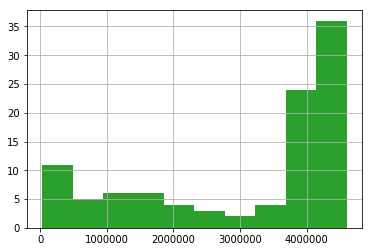

In [46]:
# converting to pandas dataframe
import matplotlib.pyplot as plt 
pandas_df = df.toPandas()
pandas_df['total'].hist()
plt.show()

In [48]:
#############################
# Interacting with Spark SQL
#############################

# registering df as a tamperorary table, we pass the registerTempTable() a name, which is the name of table.
df.registerTempTable('census2010')
tables = sqlCtx.tableNames()
print(tables)

['census2010']


In [50]:
# We call sql method on the SQL object in Spark, and pass the query as a string, without ;
# becuase Spark returns a dataframe object, we should call the show() method
sqlCtx.sql('select age from census2010').show(5)

+---+
|age|
+---+
|  0|
|  1|
|  2|
|  3|
|  4|
+---+
only showing top 5 rows



In [52]:
# More complex query
query = 'select males,females from census2010 where age > 5 and age < 15'
sqlCtx.sql(query).show(5)

+-------+-------+
|  males|females|
+-------+-------+
|2093905|2007781|
|2097080|2010281|
|2101670|2013771|
|2108014|2018603|
|2114217|2023289|
+-------+-------+
only showing top 5 rows



In [53]:
# combining SQL and DataFrame methods to get summary statitics of two columns
query='select males,females from census2010'
sqlCtx.sql(query).describe().show(5)

+-------+------------------+-----------------+
|summary|             males|          females|
+-------+------------------+-----------------+
|  count|               101|              101|
|   mean|1520095.3168316833|1571460.287128713|
| stddev|  818587.208016823|748671.0493484351|
|    min|              4612|            25673|
|    max|           2285990|          2331572|
+-------+------------------+-----------------+



In [54]:
# Joining datasets with SQL
# SparkSQL can easily join different file formats
df_2000 = sqlCtx.read.json("census_2000.json")
df_1990 = sqlCtx.read.json("census_1990.json")
df_1980 = sqlCtx.read.json("census_1980.json")

df_2000.registerTempTable('census2000')
df_1990.registerTempTable('census1990')
df_1980.registerTempTable('census1980')
tables = sqlCtx.tableNames()
print(tables)

['census1980', 'census1990', 'census2000', 'census2010']


In [55]:
# Write a query that returns a DataFrame with the total columns for the tables census2010 and census2000 (in that order).
query = """
 select census2010.total, census2000.total
 from census2010
 inner join census2000
 on census2010.age=census2000.age
"""

sqlCtx.sql(query).show(5)

+-------+-------+
|  total|  total|
+-------+-------+
|4079669|3733034|
|4085341|3825896|
|4089295|3904845|
|4092221|3970865|
|4094802|4024943|
+-------+-------+
only showing top 5 rows



In [56]:
# Write a query that calculates the sums of the total column from each of the tables
query = """
 select sum(census2010.total), sum(census2000.total), sum(census1990.total)
 from census2010
 inner join census2000
 on census2010.age=census2000.age
 inner join census1990
 on census2010.age=census1990.age
"""
sqlCtx.sql(query).show(5)

+----------+----------+----------+
|sum(total)|sum(total)|sum(total)|
+----------+----------+----------+
| 312247116| 284594395| 254506647|
+----------+----------+----------+

